In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [54]:
pd.options.plotting.backend = "plotly"

In [33]:
df = pd.read_csv('../Video_games_esrb_rating.csv')
df.head()

title  console  alcohol_reference  \
0         Monster Jam Steel Titans 2        1                  0   
1             Subnautica: Below Zero        1                  0   
2  NIER REPLICANT VER.1.22474487139…        1                  0   
3                         Jamestown+        0                  0   
4             Neptunia Virtual Stars        0                  0   

   animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  \
0               0      0               0                 0            0   
1               1      0               0                 0            0   
2               0      1               0                 0            0   
3               0      0               0                 0            0   
4               0      0               0                 0            0   

   drug_reference  fantasy_violence  ...  sexual_content  sexual_themes  \
0               0                 0  ...               0              0   
1               0                 0  ...               0              0   
2               0                 0  ...               0              0   
3               0                 1  ...               0              0   
4               0                 1  ...               0              0   

   simulated_gambling  strong_janguage  strong_sexual_content  \
0                   0                0                      0   
1                   0                0                      0   
2                   0                1                      0   
3                   0                0                      0   
4                   0                0                      0   

   suggestive_themes  use_of_alcohol  use_of_drugs_and_alcohol  violence  \
0                  0               0                         0         0   
1                  0               0                         0         0   
2                  1               0                         0         0   
3                  0               0                         0         0   
4                  1               0                         0         0   

   esrb_rating  
0            E  
1           ET  
2            M  
3           ET  
4            T  

[5 rows x 34 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [35]:
df.describe()
df.drop(['title'], inplace=True, axis=1)

In [36]:
df

console  alcohol_reference  animated_blood  blood  blood_and_gore  \
0           1                  0               0      0               0   
1           1                  0               1      0               0   
2           1                  0               0      1               0   
3           0                  0               0      0               0   
4           0                  0               0      0               0   
...       ...                ...             ...    ...             ...   
1890        0                  0               0      0               0   
1891        0                  0               0      0               0   
1892        0                  0               0      0               0   
1893        0                  0               0      1               0   
1894        1                  0               0      0               0   

      cartoon_violence  crude_humor  drug_reference  fantasy_violence  \
0                    0            0               0                 0   
1                    0            0               0                 0   
2                    0            0               0                 0   
3                    0            0               0                 1   
4                    0            0               0                 1   
...                ...          ...             ...               ...   
1890                 0            0               0                 1   
1891                 0            0               0                 1   
1892                 0            0               0                 0   
1893                 0            0               0                 0   
1894                 0            0               0                 0   

      intense_violence  ...  sexual_content  sexual_themes  \
0                    0  ...               0              0   
1                    1  ...               0              0   
2                    0  ...               0              0   
3                    0  ...               0              0   
4                    0  ...               0              0   
...                ...  ...             ...            ...   
1890                 0  ...               1              1   
1891                 0  ...               0              0   
1892                 0  ...               0              0   
1893                 0  ...               0              0   
1894                 0  ...               0              0   

      simulated_gambling  strong_janguage  strong_sexual_content  \
0                      0                0                      0   
1                      0                0                      0   
2                      0                1                      0   
3                      0                0                      0   
4                      0                0                      0   
...                  ...              ...                    ...   
1890                   0                1                      0   
1891                   0                0                      0   
1892                   0                0                      0   
1893                   0                0                      0   
1894                   0                0                      0   

      suggestive_themes  use_of_alcohol  use_of_drugs_and_alcohol  violence  \
0                     0               0                         0         0   
1                     0               0                         0         0   
2                     1               0                         0         0   
3                     0               0                         0         0   
4                     1               0                         0         0   
...                 ...             ...                       ...       ...   
1890                  0               0                         0         0   
1891                  0           

In [37]:
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [38]:
df['esrb_rating'] = df['esrb_rating'].replace(
    'E', 0).replace('ET', 1).replace('T', 2).replace('M', 3)

In [55]:
df.head()

console  alcohol_reference  animated_blood  blood  blood_and_gore  \
0        1                  0               0      0               0   
1        1                  0               1      0               0   
2        1                  0               0      1               0   
3        0                  0               0      0               0   
4        0                  0               0      0               0   

   cartoon_violence  crude_humor  drug_reference  fantasy_violence  \
0                 0            0               0                 0   
1                 0            0               0                 0   
2                 0            0               0                 0   
3                 0            0               0                 1   
4                 0            0               0                 1   

   intense_violence  ...  sexual_content  sexual_themes  simulated_gambling  \
0                 0  ...               0              0                   0   
1                 1  ...               0              0                   0   
2                 0  ...               0              0                   0   
3                 0  ...               0              0                   0   
4                 0  ...               0              0                   0   

   strong_janguage  strong_sexual_content  suggestive_themes  use_of_alcohol  \
0                0                      0                  0               0   
1                0                      0                  0               0   
2                1                      0                  1               0   
3                0                      0                  0               0   
4                0                      0                  1               0   

   use_of_drugs_and_alcohol  violence  esrb_rating  
0                         0         0            0  
1                         0         0            1  
2                         0         0            3  
3                         0         0            1  
4                         0         0            2  

[5 rows x 33 columns]

In [40]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

In [41]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20,
                             max_depth=11,
                             random_state=SEED)


In [51]:
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)


DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1608637542)


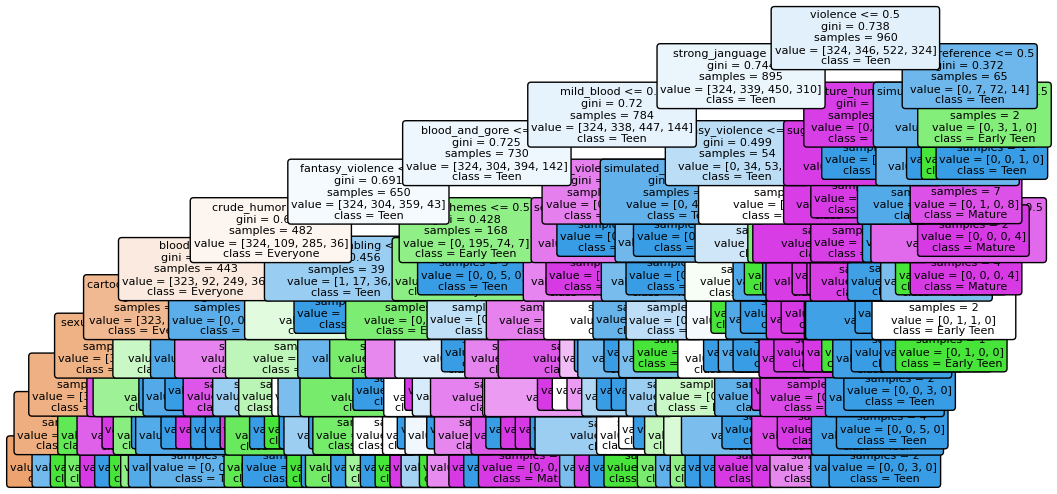

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1273642419)


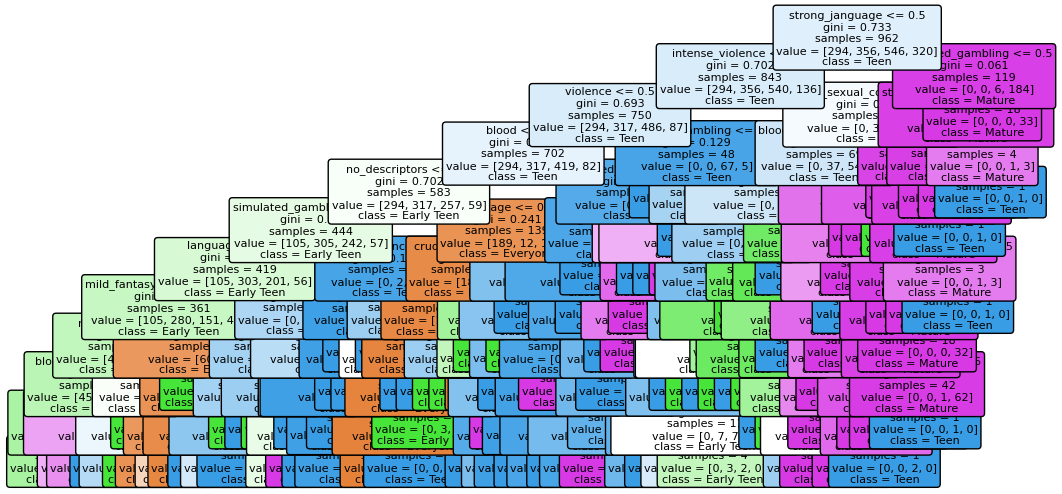

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1935803228)


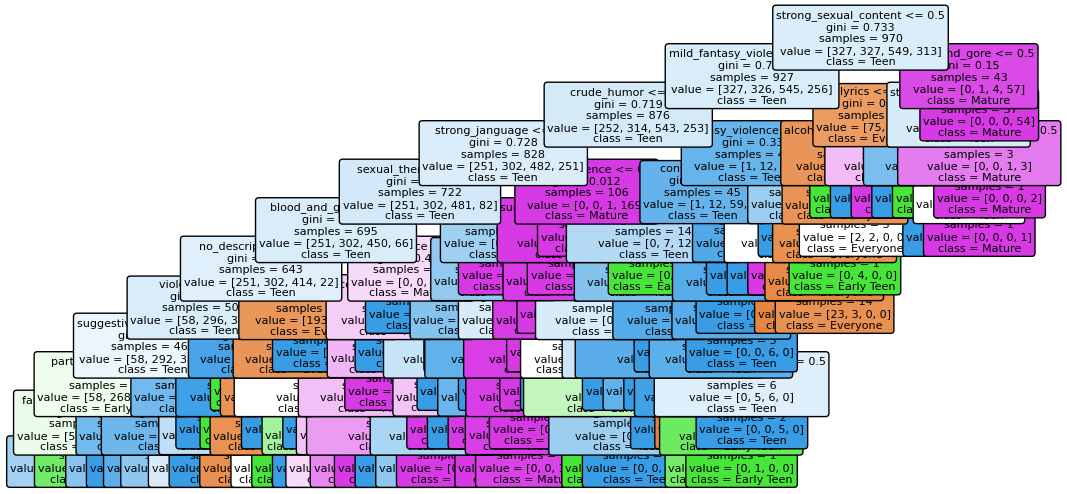

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=787846414)


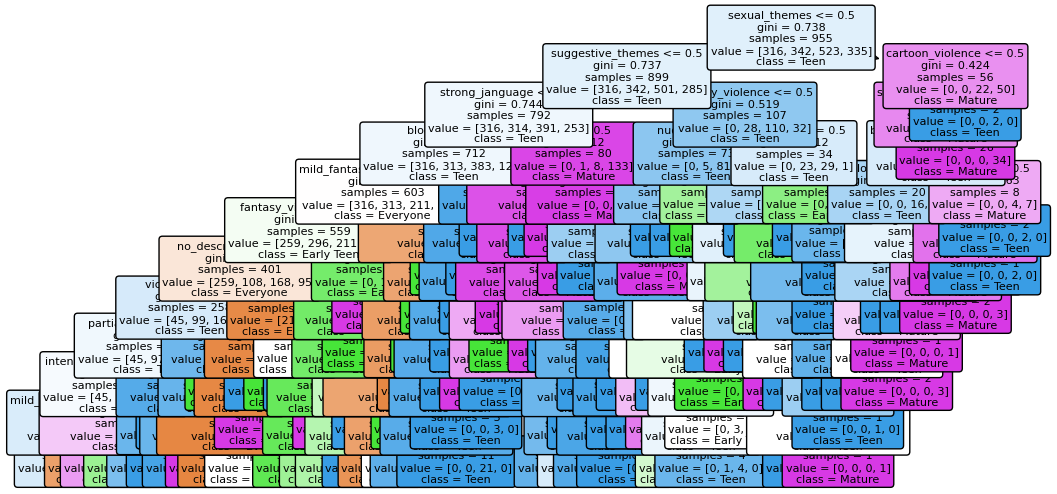

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=996406378)


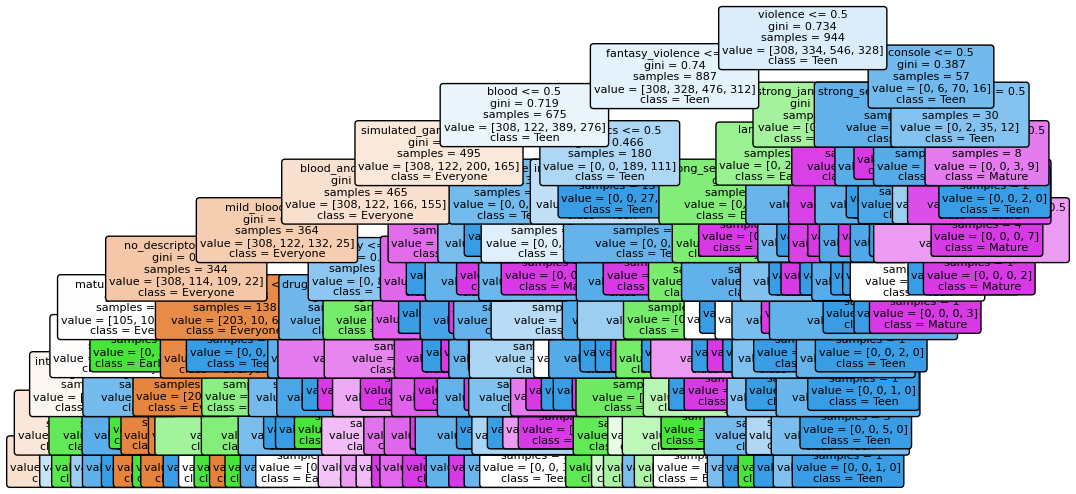

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1201263687)


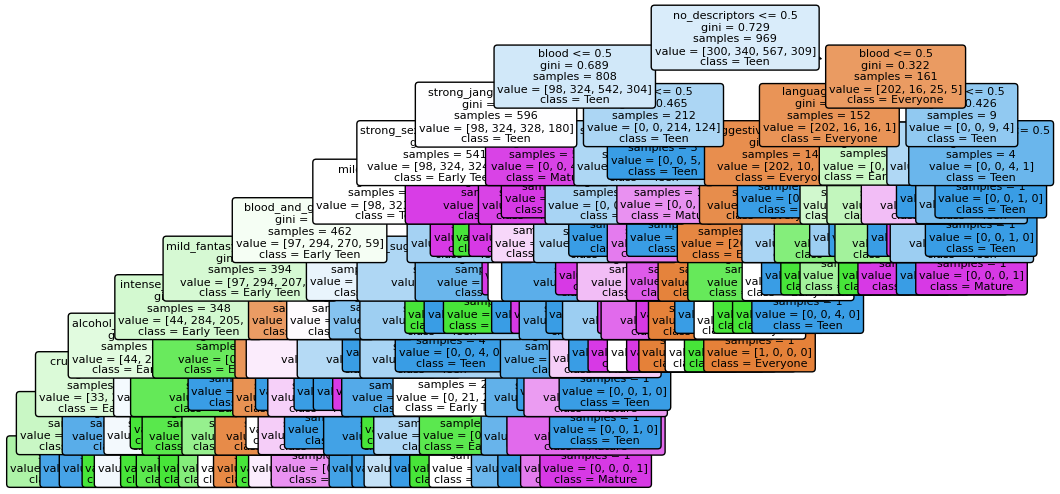

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=423734972)


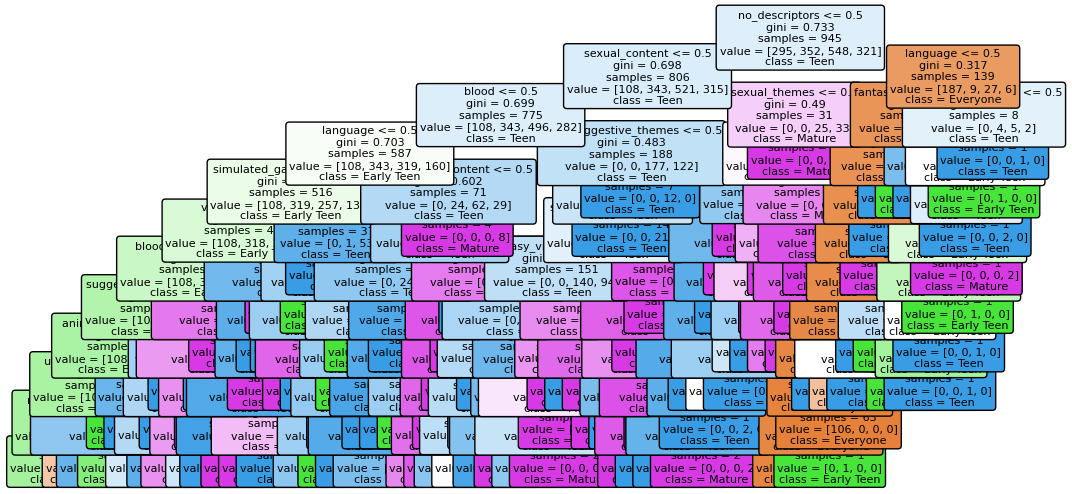

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=415968276)


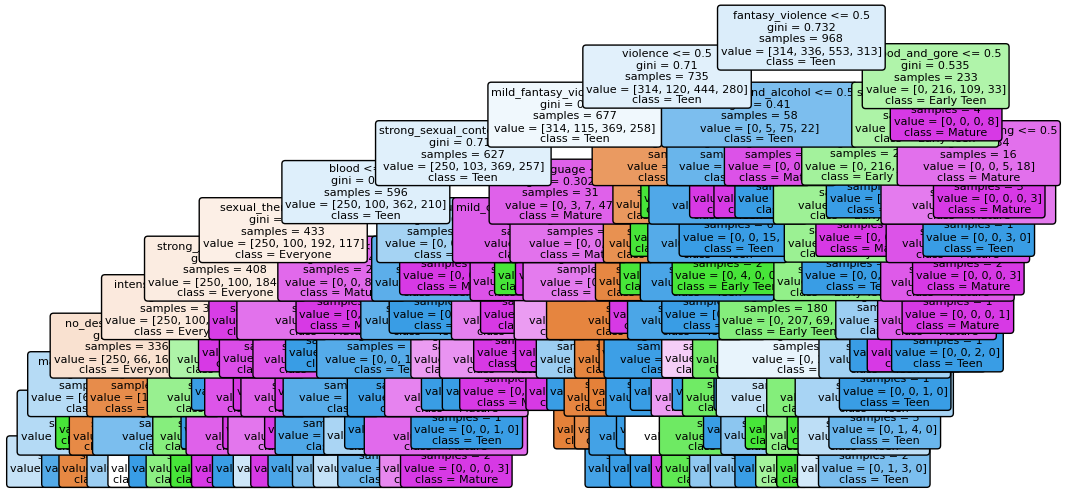

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=670094950)


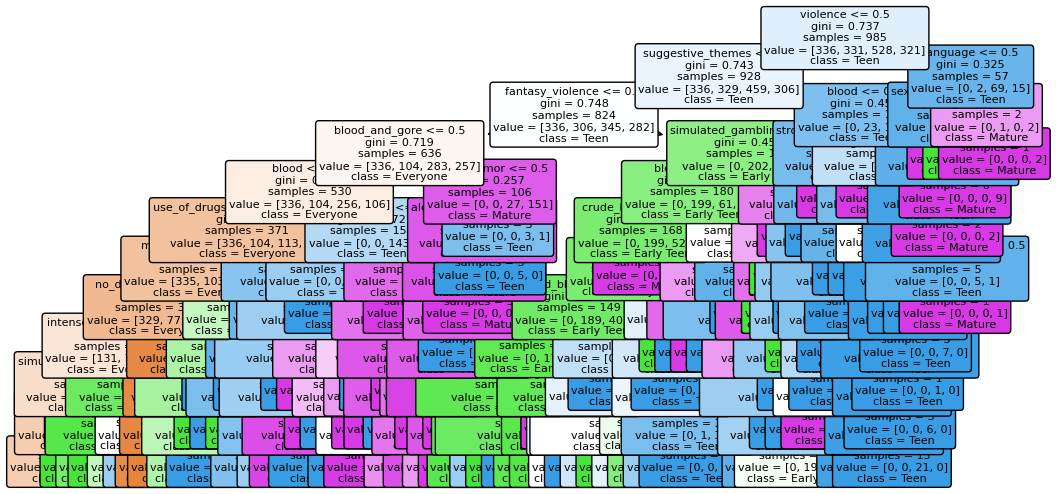

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1914837113)


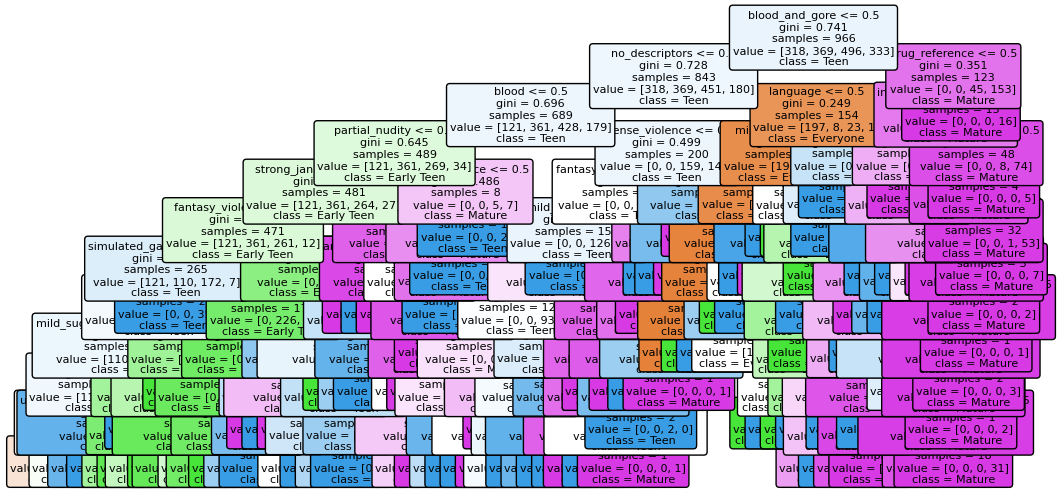

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=669991378)


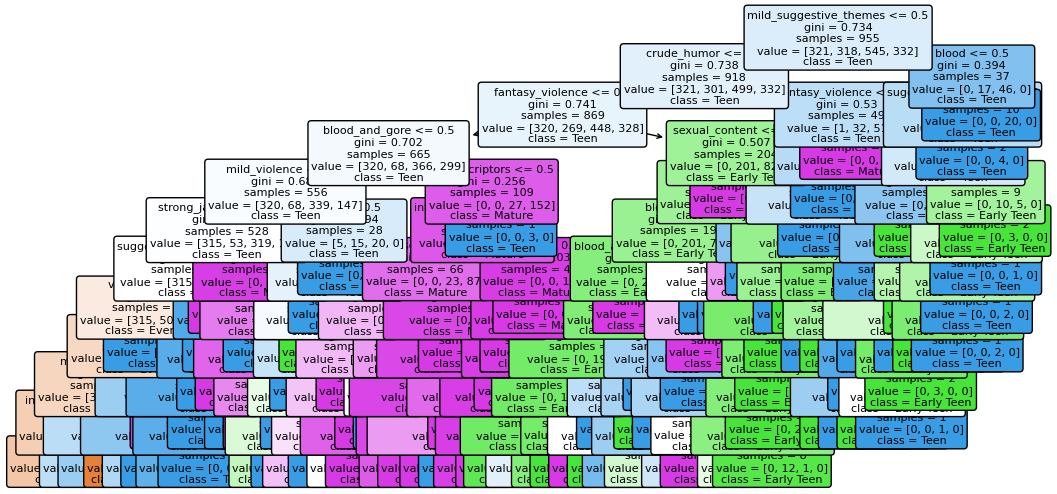

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=429389014)


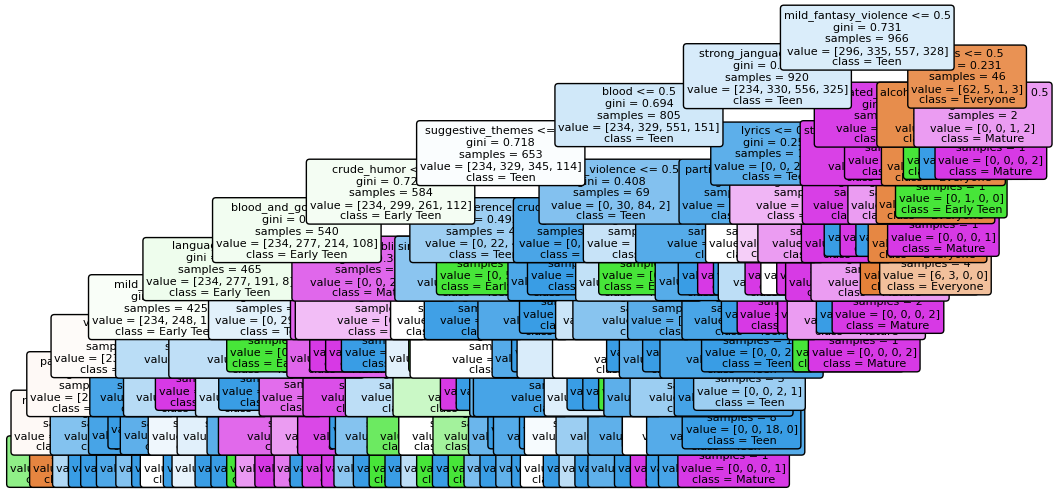

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=249467210)


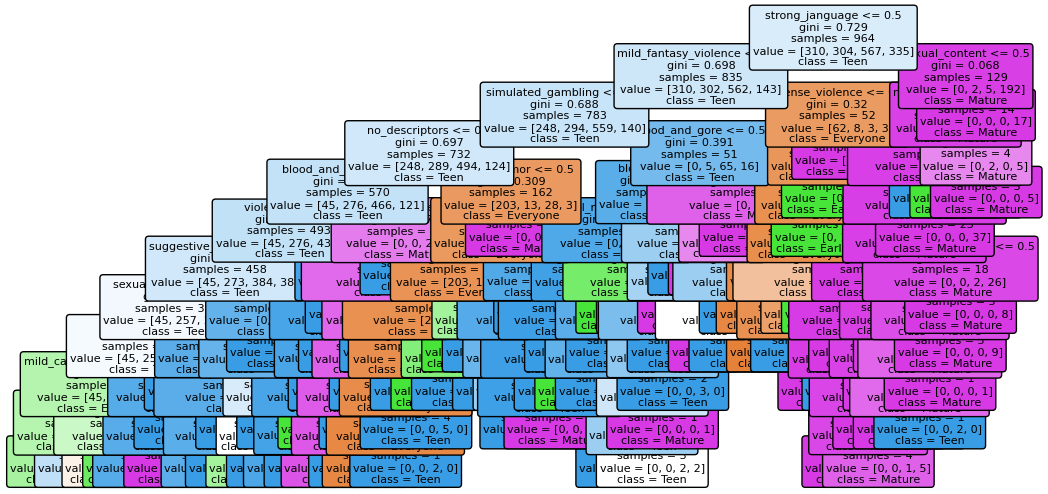

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1972458954)


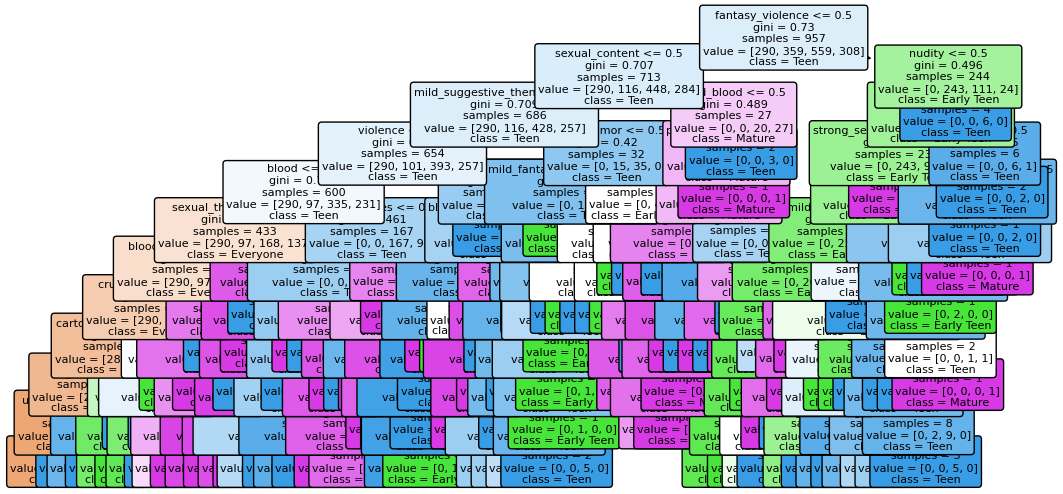

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1572714583)


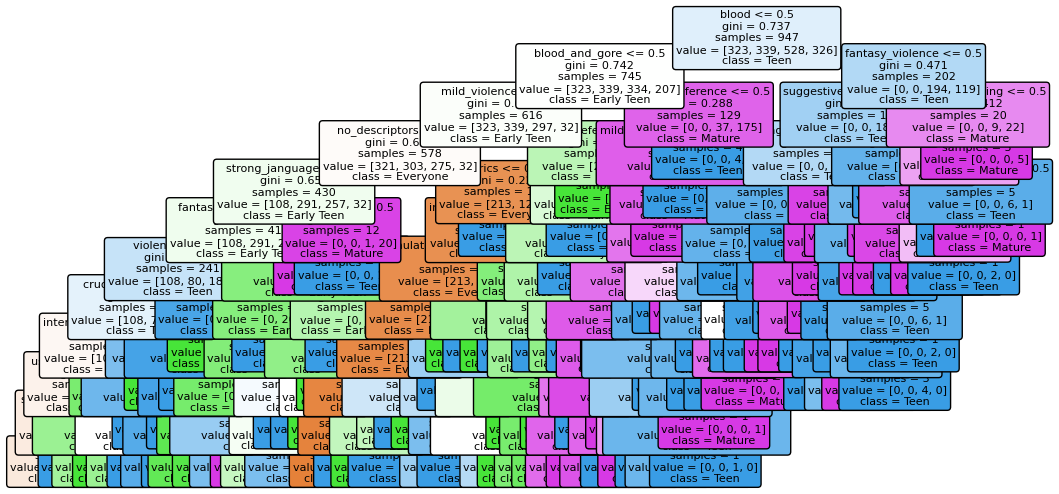

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=1433267572)


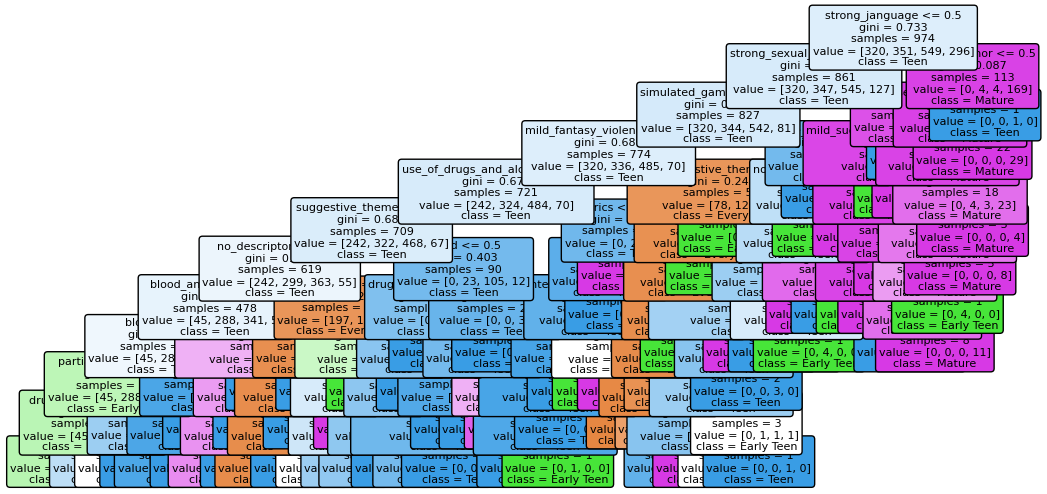

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=434285667)


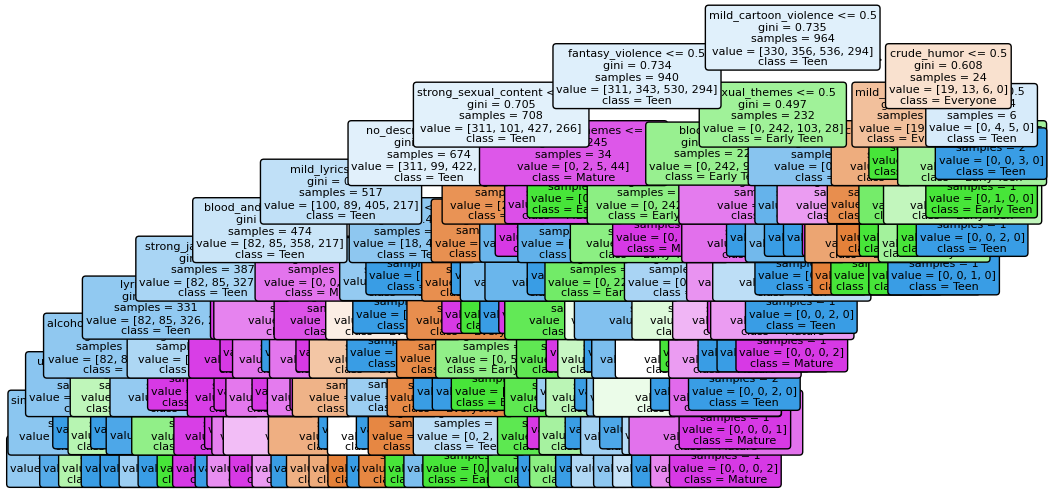

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=613608295)


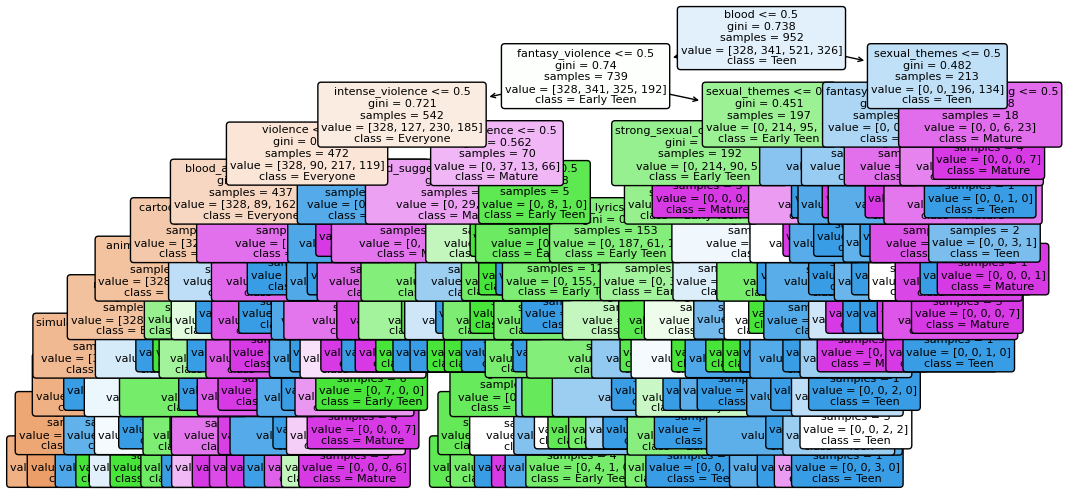

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=893664919)


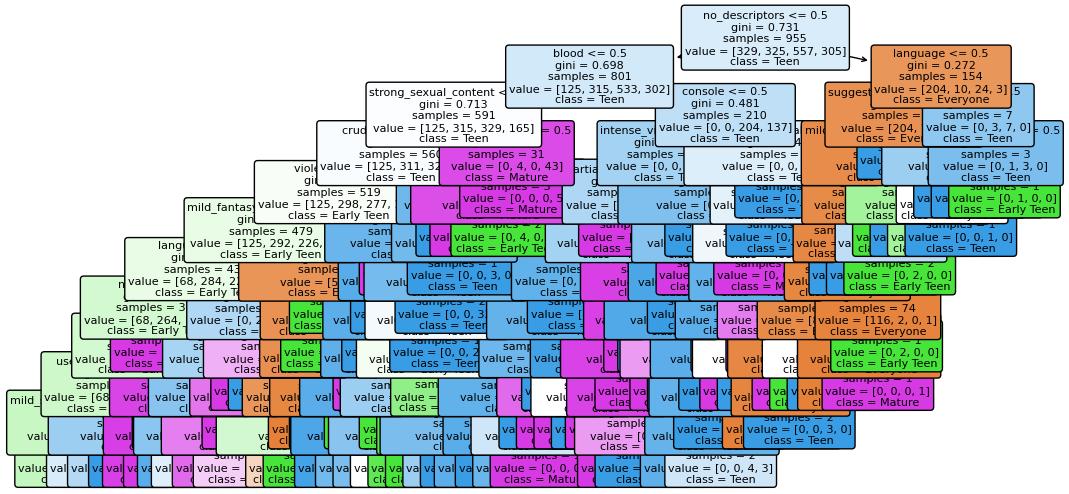

DecisionTreeClassifier(max_depth=11, max_features='auto',
                       random_state=648061058)


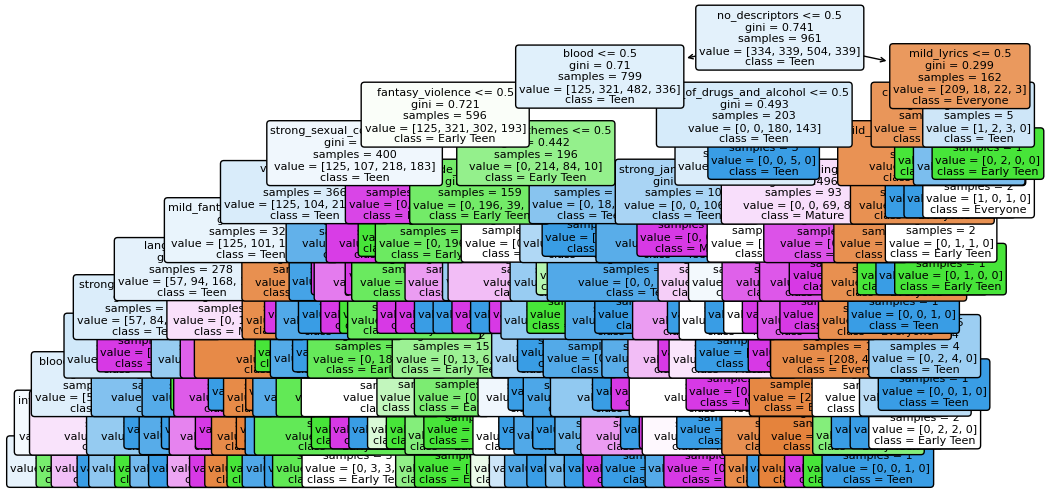

In [52]:
from sklearn import tree

features = X.columns.values  # The name of each column
classes = ['Everyone', 'Early Teen', 'Teen', 'Mature']  # The name of each class

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12, 6))
    tree.plot_tree(estimator,
                   feature_names=features,
                   class_names=classes,
                   fontsize=8,
                   filled=True,
                   rounded=True)
    plt.show()


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.75      0.82      0.78        61
           2       0.85      0.84      0.85       146
           3       0.91      0.84      0.87        73

    accuracy                           0.87       379
   macro avg       0.87      0.87      0.87       379
weighted avg       0.88      0.87      0.87       379



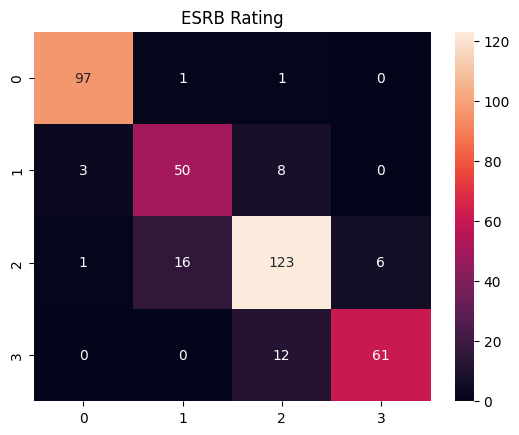

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('ESRB Rating')

print(classification_report(y_test,y_pred))

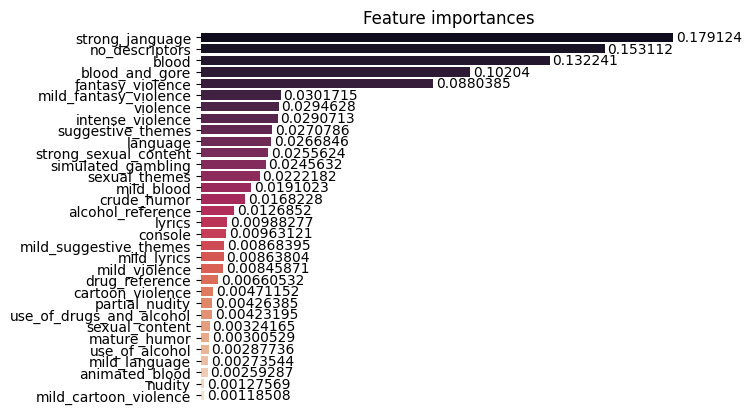

In [46]:
features_df = pd.DataFrame(
    {'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_})

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances',
                y='features', palette="rocket")
sns.despine(bottom=True, left=True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)


In [56]:
rfc_ = RandomForestClassifier(n_estimators=20,
                              max_depth=11,
                              random_state=SEED)
rfc_.fit(X_train, y_train)
y_pred = rfc_.predict(X_test)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.75      0.82      0.78        61
           2       0.85      0.84      0.85       146
           3       0.91      0.84      0.87        73

    accuracy                           0.87       379
   macro avg       0.87      0.87      0.87       379
weighted avg       0.88      0.87      0.87       379



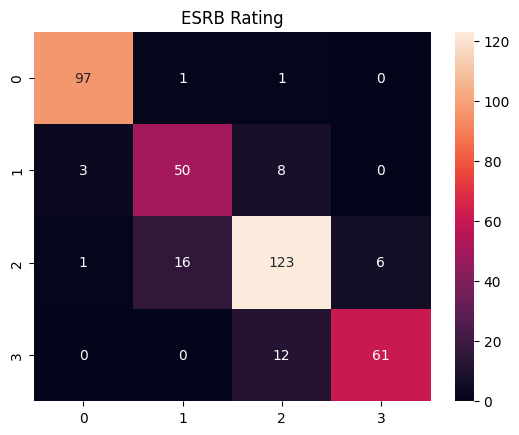

In [57]:
cm_ = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_, annot=True, fmt='d').set_title('ESRB Rating')

print(classification_report(y_test,y_pred))

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.13192612137203166
Mean Squared Error: 0.1424802110817942
Root Mean Squared Error: 0.37746550979101945
